In [6]:
from tqdm import tqdm
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
import matplotlib.animation as animation

import os

import config
from analysis.analysis_utils import get_states, get_world_properties
from analysis.plotting_utils import plot_state
from analysis.video_utils import animate_plots, generate_plots
from world_generation.generation_config import GameDifficulty

import numpy as np

# Human Planning Horizon - Sequential Decision Making in Frogger

## Reconstructing levels from saved state data

In [7]:
subject = 'TEST01'
difficulty = GameDifficulty.EASY.value
world_name = 'world_0'

states = get_states(subject, difficulty, world_name)
world_props = get_world_properties(subject, difficulty, world_name)
target_position = int(world_props['target_position'])

<IPython.core.display.Javascript object>


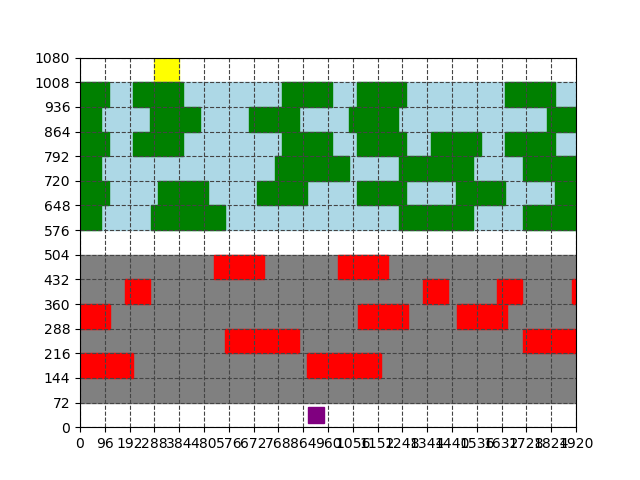

In [8]:
fig, ax = plt.subplots()
plot_state(ax, states[0][1], target_position, time=states[0][0])
plt.show()

Generating frames for animation of gameplay video...


  0%|          | 0/1324 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


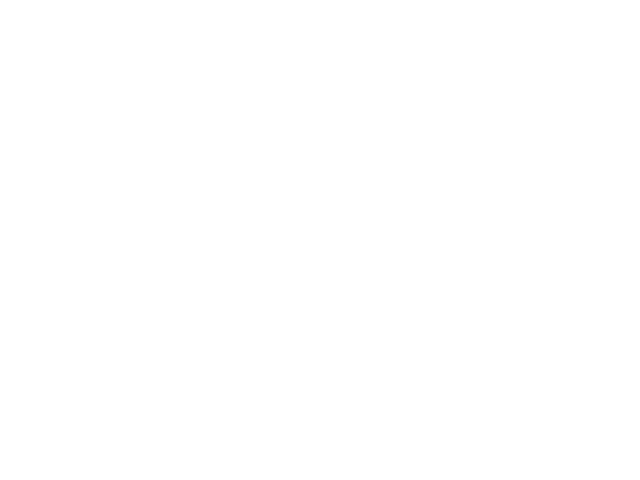

  0%|          | 1/1324 [00:00<06:26,  3.42it/s]

<IPython.core.display.Javascript object>


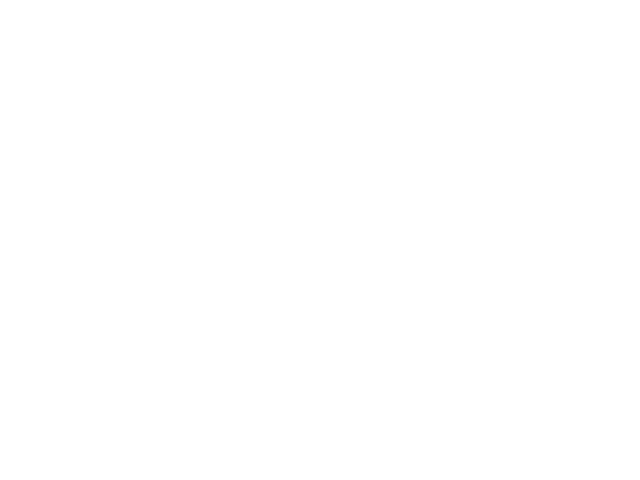

  0%|          | 2/1324 [00:00<05:18,  4.15it/s]

<IPython.core.display.Javascript object>


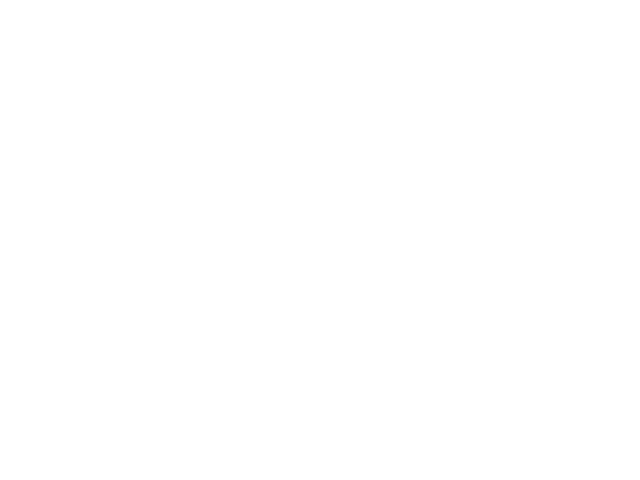

  0%|          | 3/1324 [00:00<04:55,  4.47it/s]

<IPython.core.display.Javascript object>


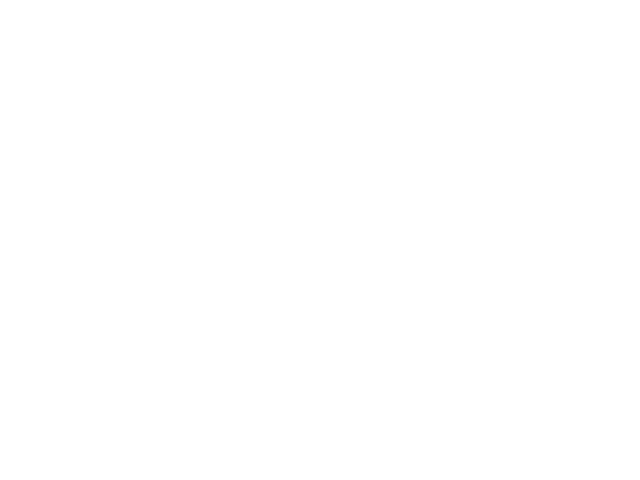

  0%|          | 4/1324 [00:00<04:42,  4.67it/s]

<IPython.core.display.Javascript object>


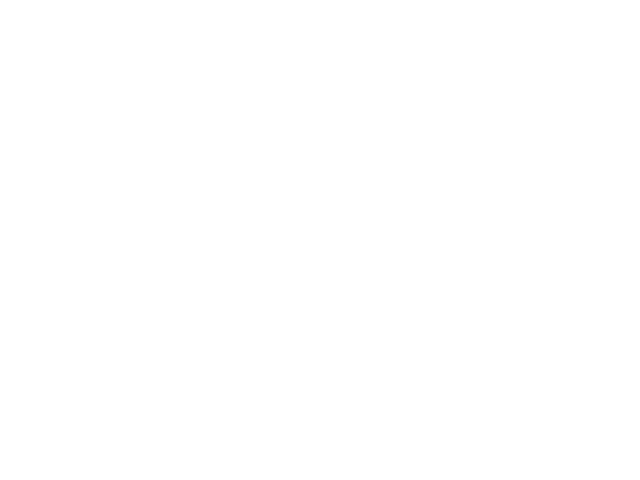

  0%|          | 5/1324 [00:01<04:37,  4.76it/s]

<IPython.core.display.Javascript object>


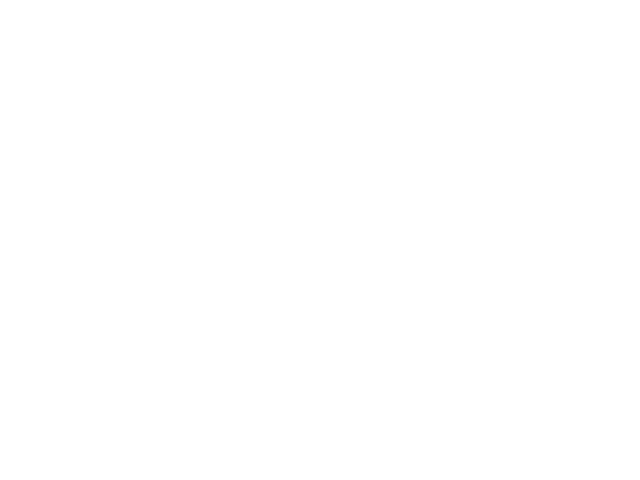

  0%|          | 6/1324 [00:01<04:58,  4.42it/s]

<IPython.core.display.Javascript object>


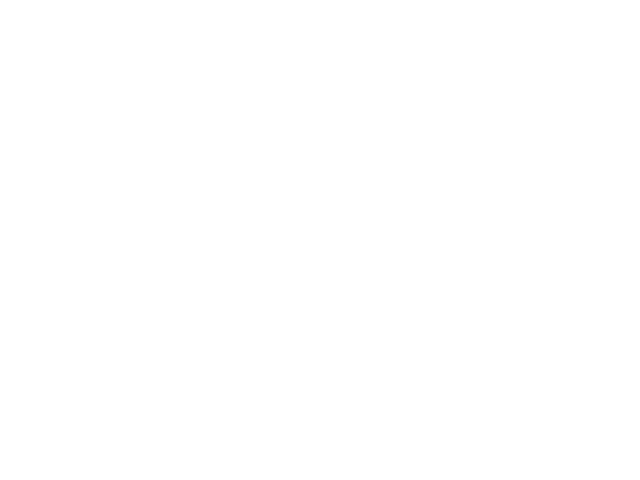

  1%|          | 7/1324 [00:01<04:46,  4.60it/s]

<IPython.core.display.Javascript object>


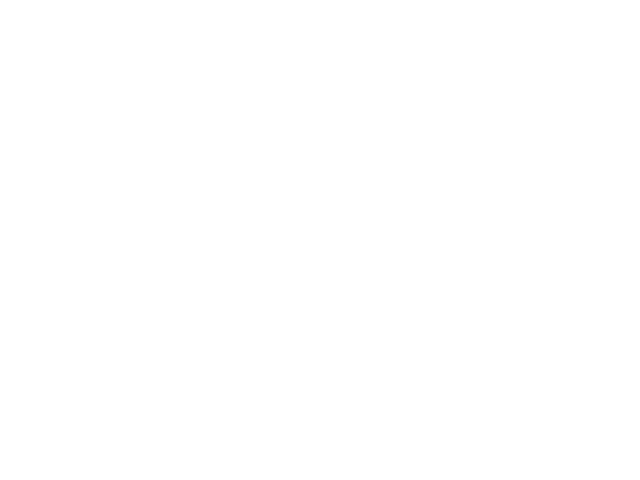

  1%|          | 8/1324 [00:01<04:36,  4.76it/s]

<IPython.core.display.Javascript object>


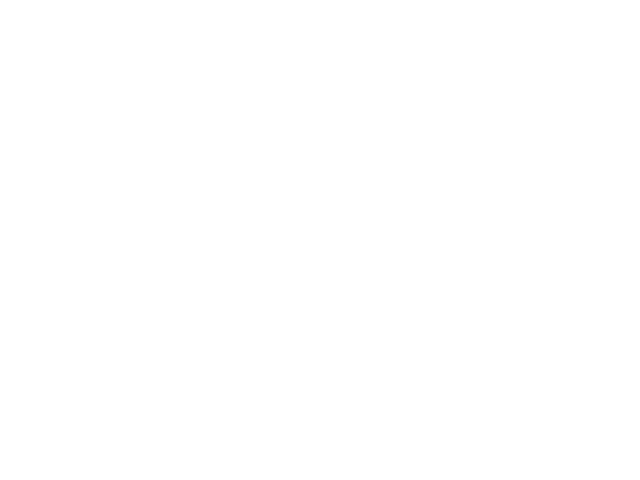

  1%|          | 9/1324 [00:01<04:29,  4.88it/s]

<IPython.core.display.Javascript object>


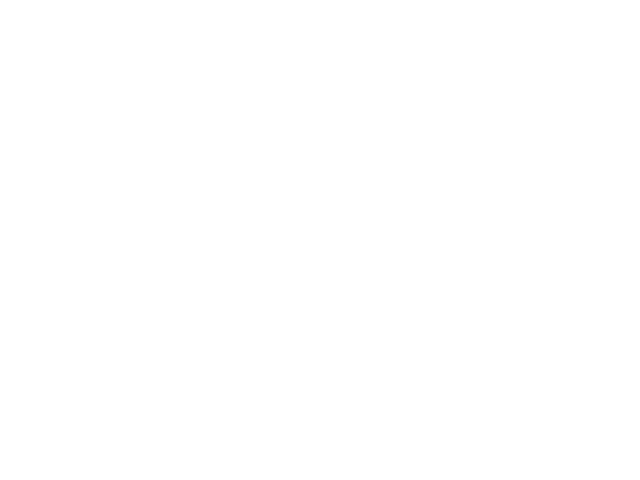

  1%|          | 10/1324 [00:02<04:29,  4.88it/s]

<IPython.core.display.Javascript object>


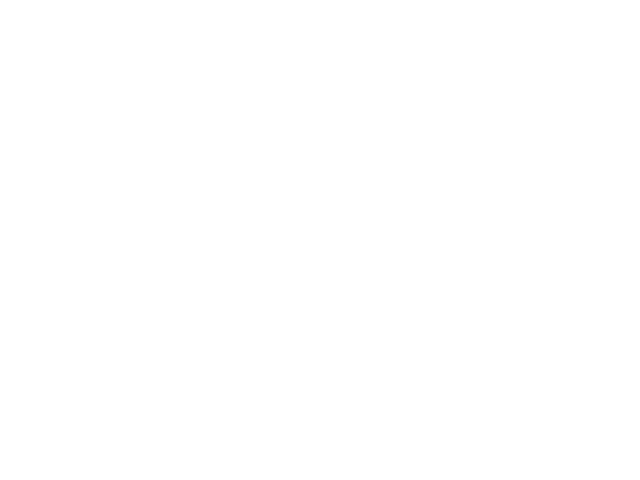

  1%|          | 11/1324 [00:02<04:32,  4.82it/s]

<IPython.core.display.Javascript object>


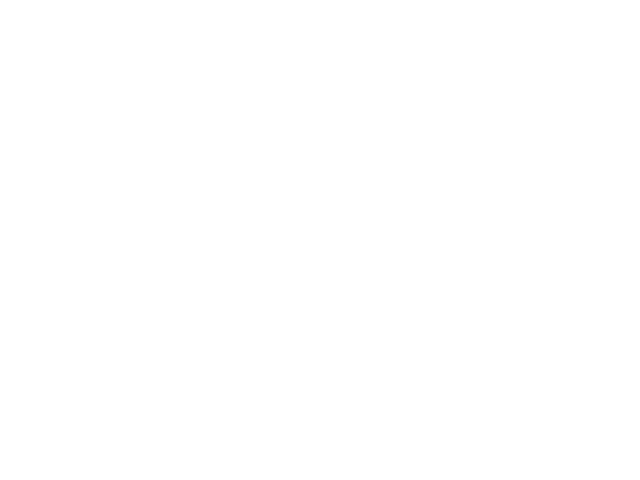

  1%|          | 12/1324 [00:02<05:00,  4.36it/s]

<IPython.core.display.Javascript object>


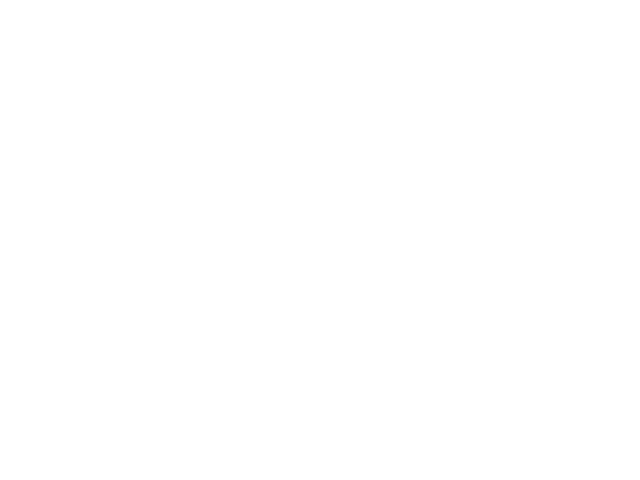

  1%|          | 13/1324 [00:02<04:56,  4.42it/s]

<IPython.core.display.Javascript object>


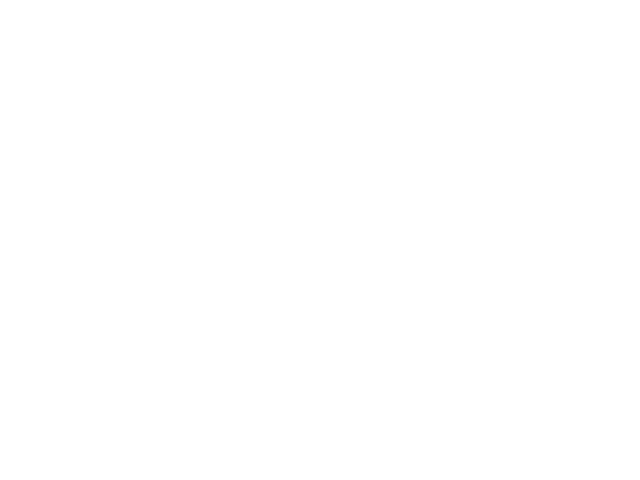

  1%|          | 14/1324 [00:03<04:49,  4.53it/s]

<IPython.core.display.Javascript object>


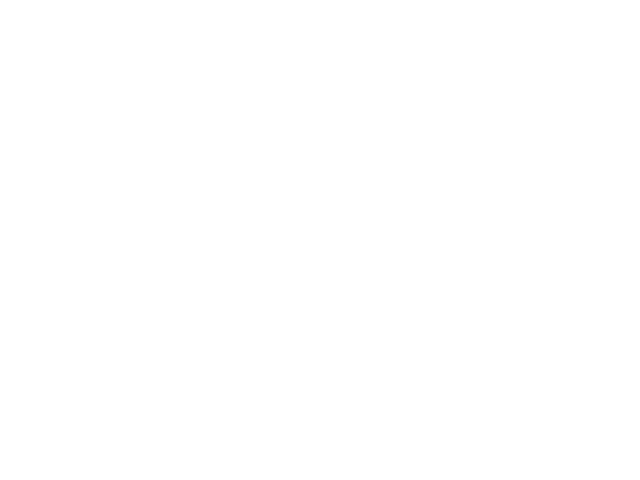

  1%|          | 15/1324 [00:03<04:45,  4.58it/s]

<IPython.core.display.Javascript object>


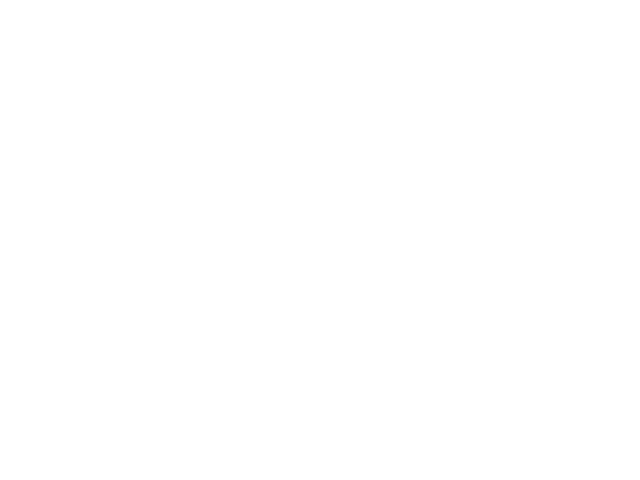

  1%|          | 16/1324 [00:03<04:38,  4.70it/s]

<IPython.core.display.Javascript object>


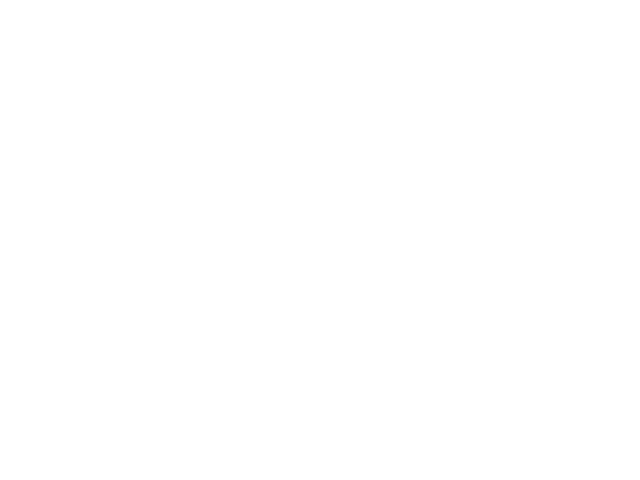

  1%|▏         | 17/1324 [00:03<04:32,  4.79it/s]

<IPython.core.display.Javascript object>


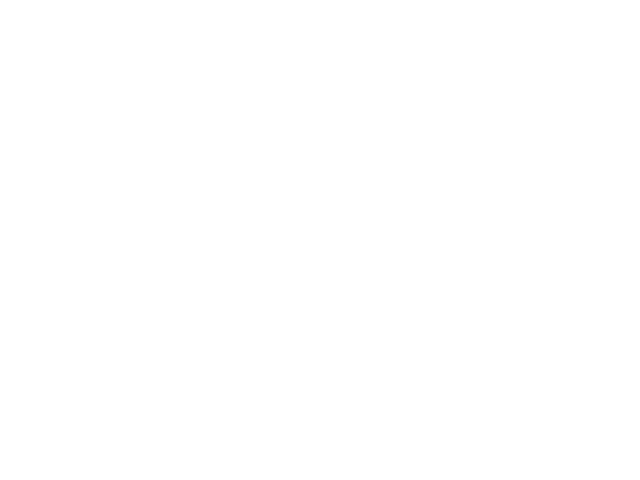

  1%|▏         | 18/1324 [00:03<04:59,  4.36it/s]

<IPython.core.display.Javascript object>


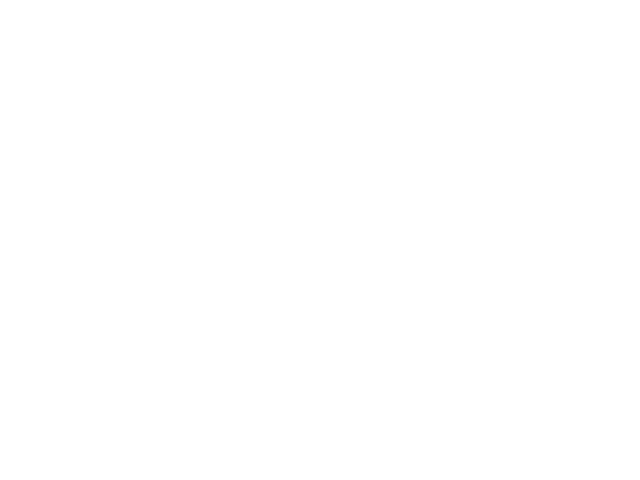

  1%|▏         | 19/1324 [00:04<04:44,  4.59it/s]

<IPython.core.display.Javascript object>


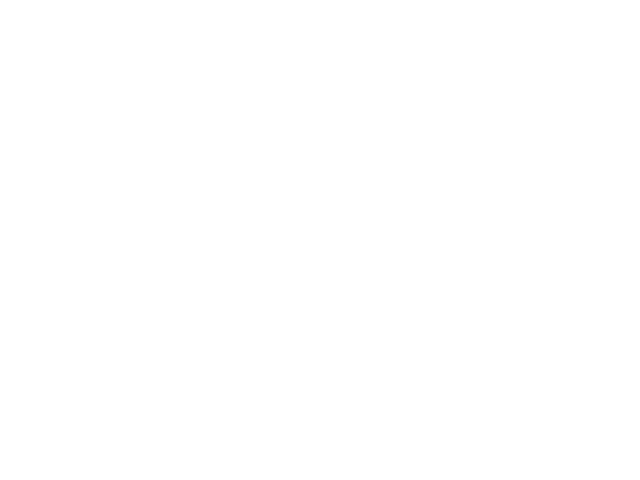

  2%|▏         | 20/1324 [00:04<04:39,  4.67it/s]

<IPython.core.display.Javascript object>


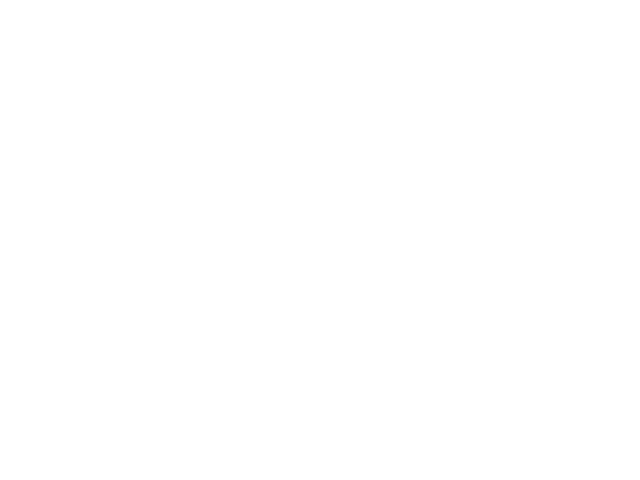

  2%|▏         | 21/1324 [00:04<04:31,  4.81it/s]

<IPython.core.display.Javascript object>


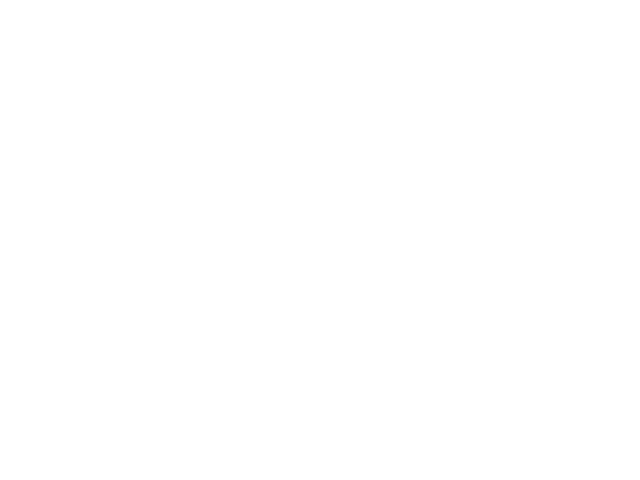

  2%|▏         | 22/1324 [00:04<04:24,  4.93it/s]

<IPython.core.display.Javascript object>


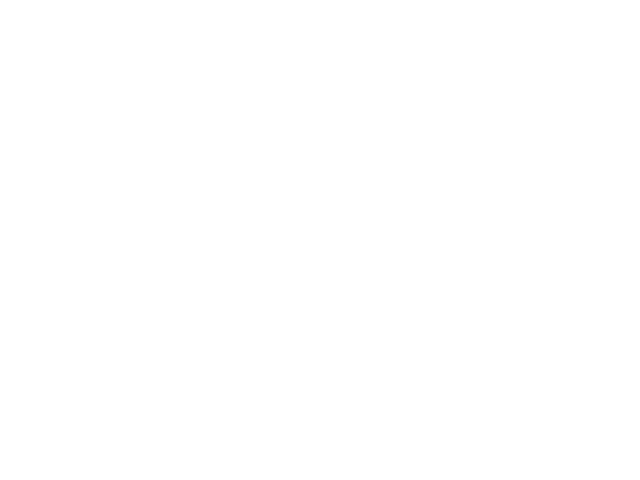

  2%|▏         | 23/1324 [00:04<04:17,  5.05it/s]

<IPython.core.display.Javascript object>


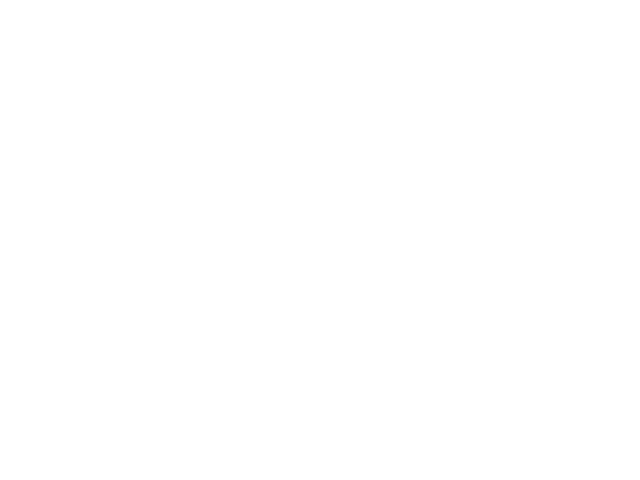

  2%|▏         | 24/1324 [00:05<04:42,  4.60it/s]

<IPython.core.display.Javascript object>


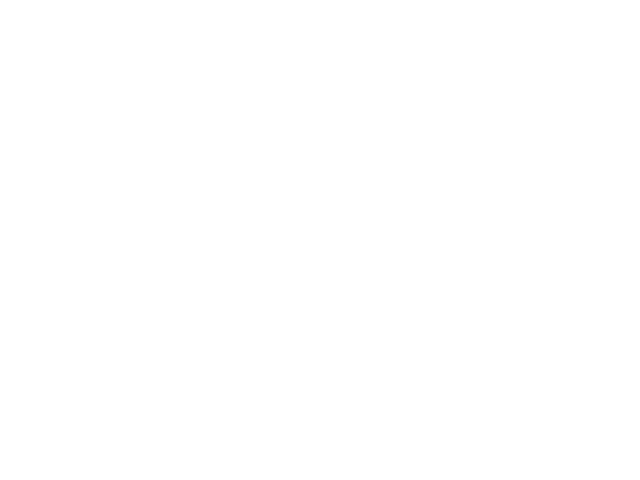

  2%|▏         | 25/1324 [00:05<04:38,  4.66it/s]

<IPython.core.display.Javascript object>


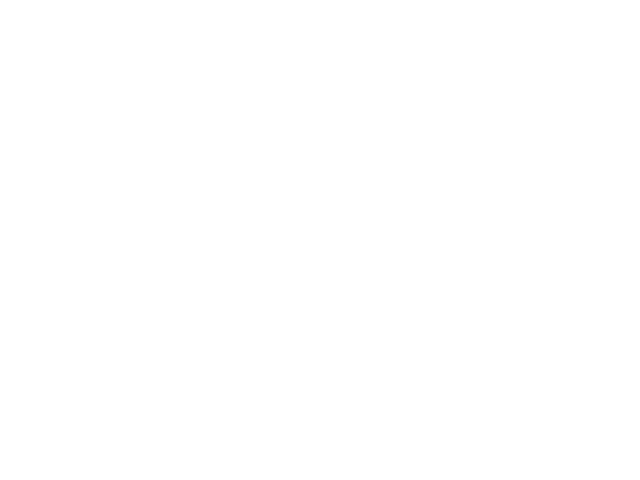

  2%|▏         | 26/1324 [00:05<04:32,  4.76it/s]

<IPython.core.display.Javascript object>


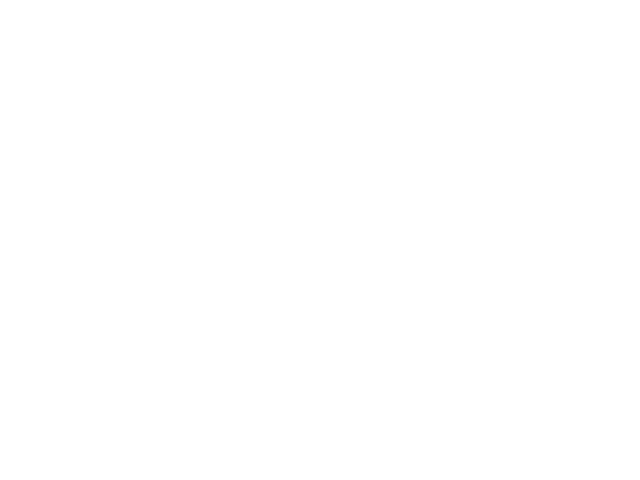

  2%|▏         | 27/1324 [00:05<04:27,  4.84it/s]

<IPython.core.display.Javascript object>


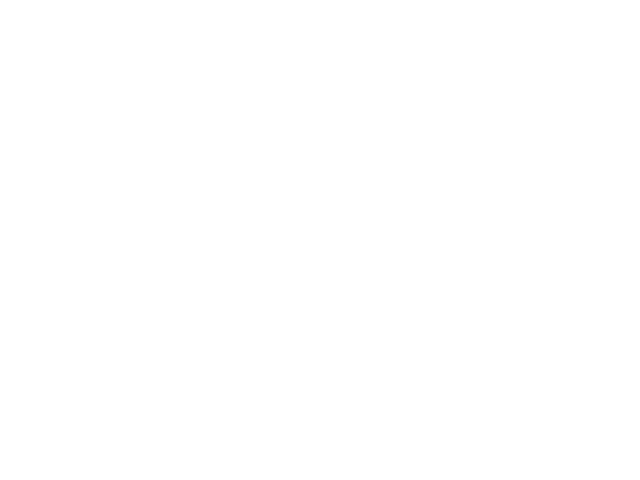

  2%|▏         | 28/1324 [00:05<04:18,  5.02it/s]

<IPython.core.display.Javascript object>


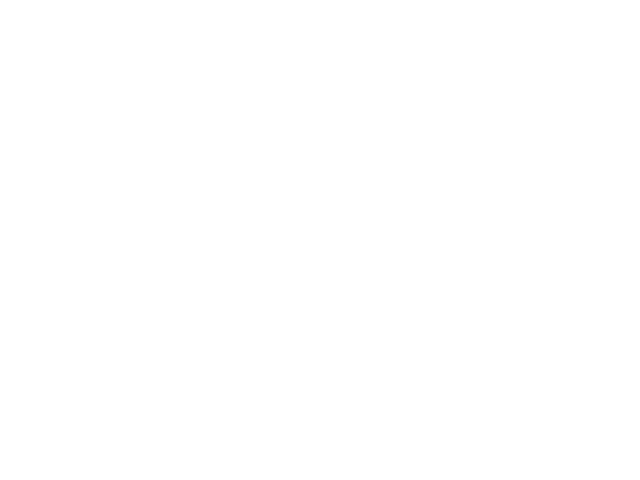

  2%|▏         | 29/1324 [00:06<04:13,  5.10it/s]

<IPython.core.display.Javascript object>


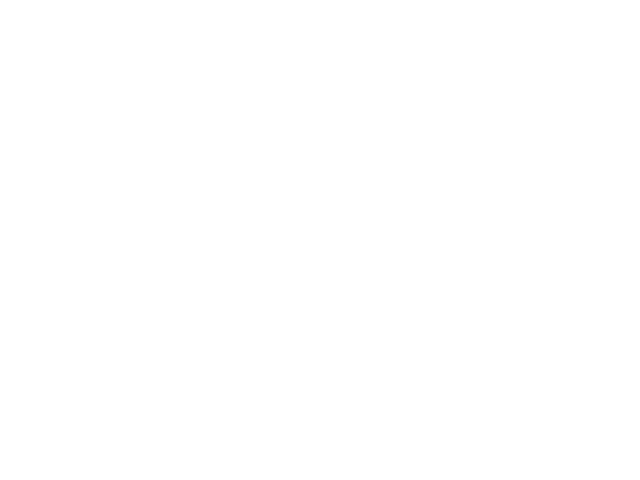

  2%|▏         | 30/1324 [00:06<04:47,  4.51it/s]

<IPython.core.display.Javascript object>


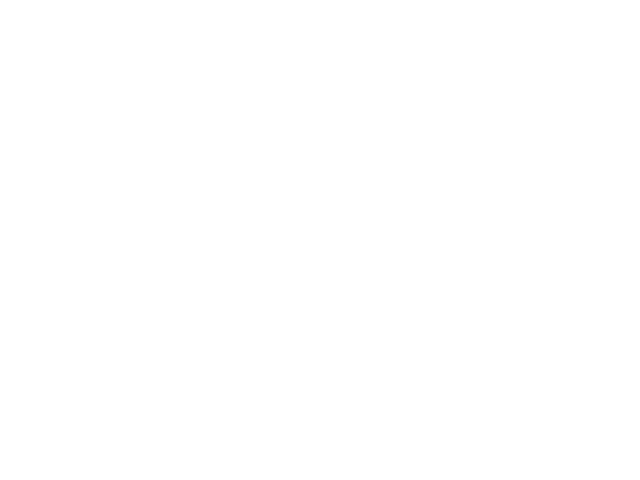

  2%|▏         | 31/1324 [00:06<04:40,  4.62it/s]

<IPython.core.display.Javascript object>


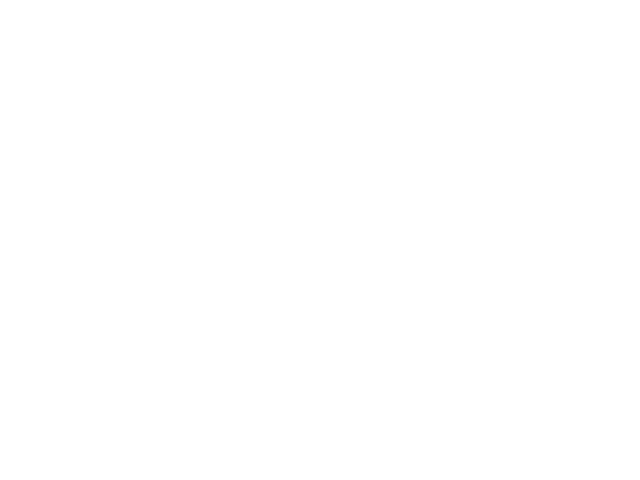

  2%|▏         | 32/1324 [00:06<04:38,  4.64it/s]

<IPython.core.display.Javascript object>


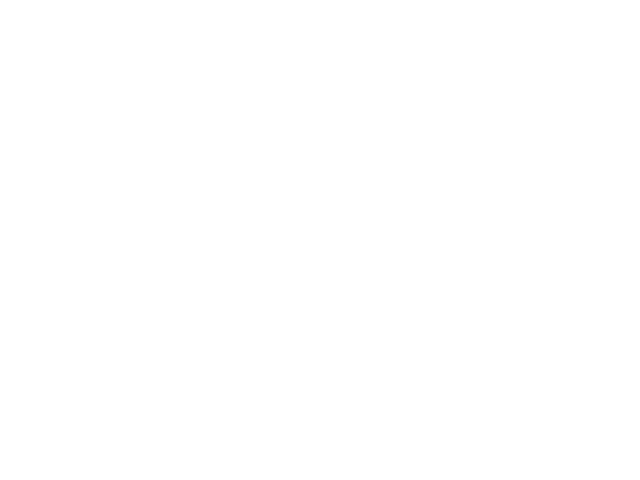

  2%|▏         | 33/1324 [00:07<04:36,  4.67it/s]

<IPython.core.display.Javascript object>


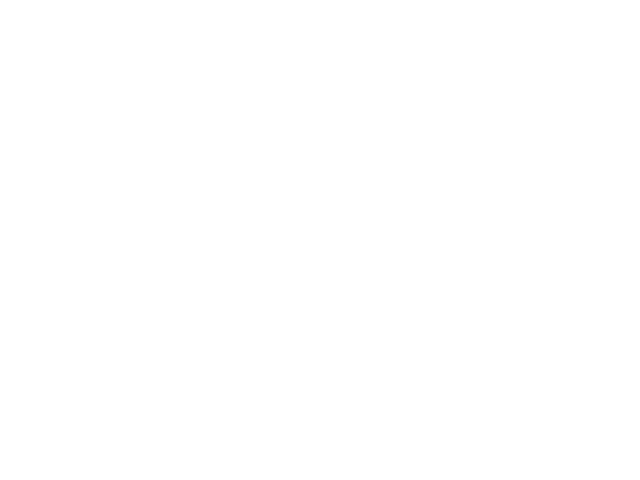

  3%|▎         | 34/1324 [00:07<04:29,  4.79it/s]

<IPython.core.display.Javascript object>


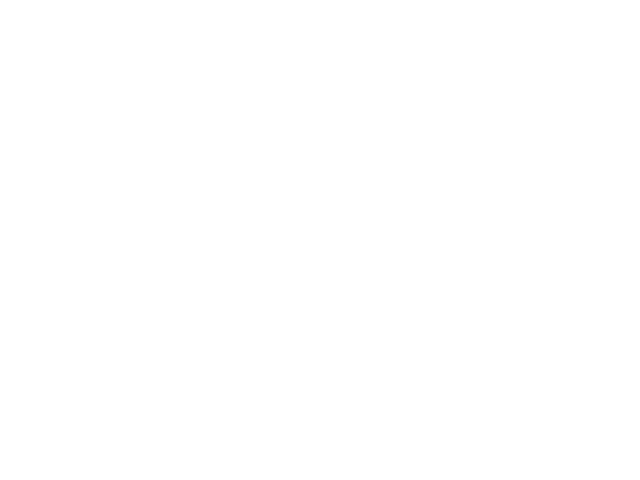

  3%|▎         | 35/1324 [00:07<04:24,  4.88it/s]

<IPython.core.display.Javascript object>


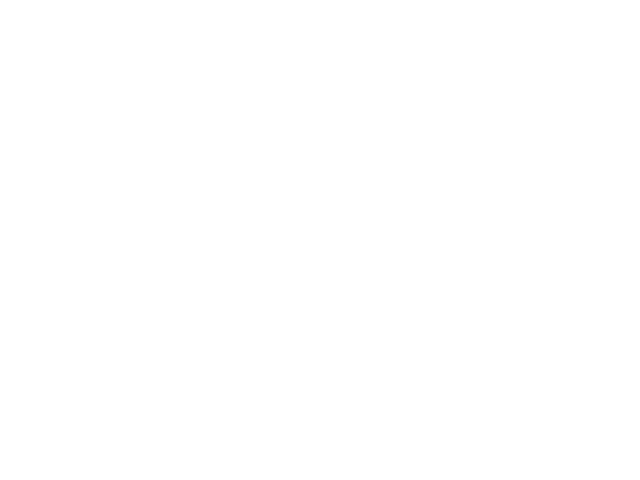

  3%|▎         | 36/1324 [00:07<04:56,  4.35it/s]

<IPython.core.display.Javascript object>


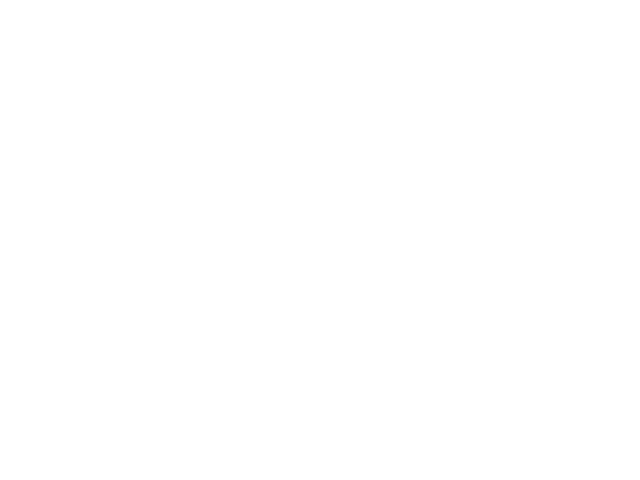

  3%|▎         | 37/1324 [00:07<04:41,  4.56it/s]

<IPython.core.display.Javascript object>


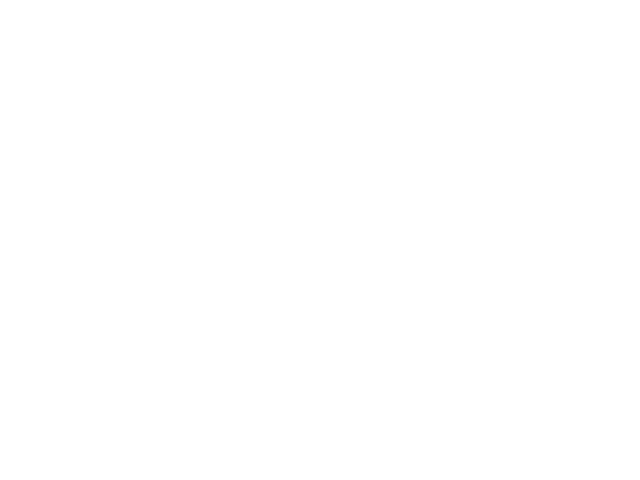

  3%|▎         | 38/1324 [00:08<04:31,  4.73it/s]

<IPython.core.display.Javascript object>


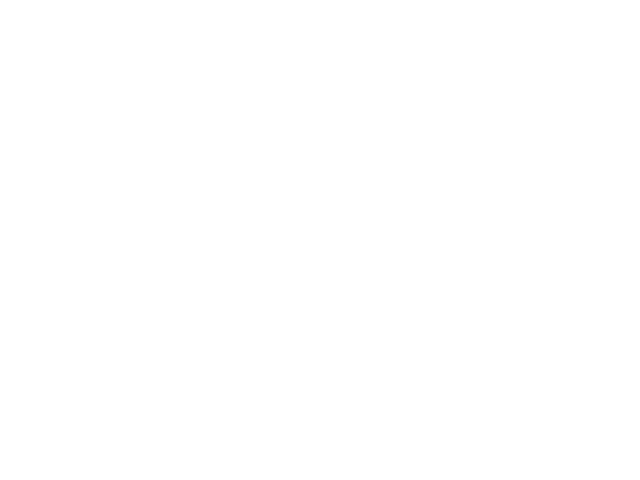

  3%|▎         | 39/1324 [00:08<04:22,  4.89it/s]

<IPython.core.display.Javascript object>


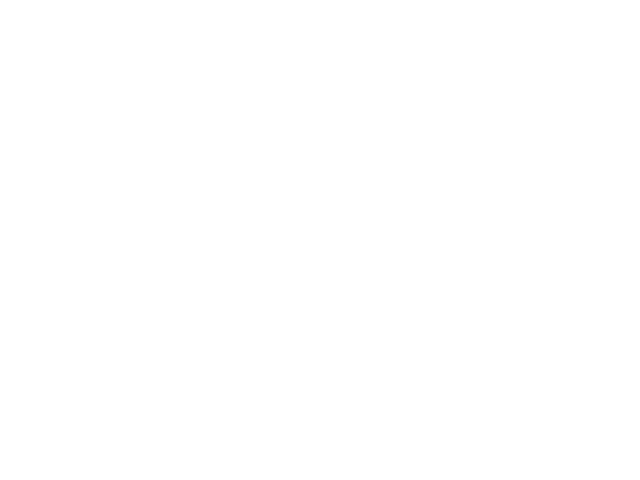

  3%|▎         | 40/1324 [00:08<04:20,  4.93it/s]

<IPython.core.display.Javascript object>


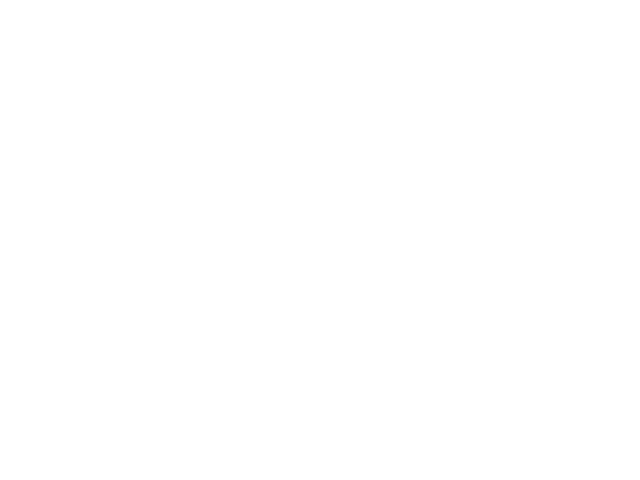

  3%|▎         | 41/1324 [00:08<04:25,  4.83it/s]

<IPython.core.display.Javascript object>


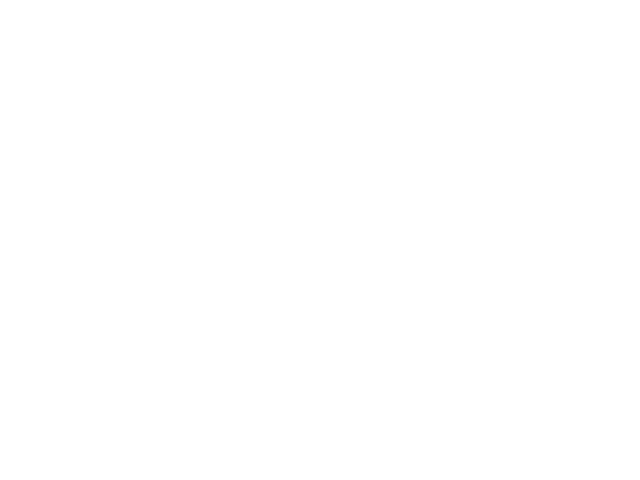

  3%|▎         | 42/1324 [00:09<04:55,  4.34it/s]

<IPython.core.display.Javascript object>


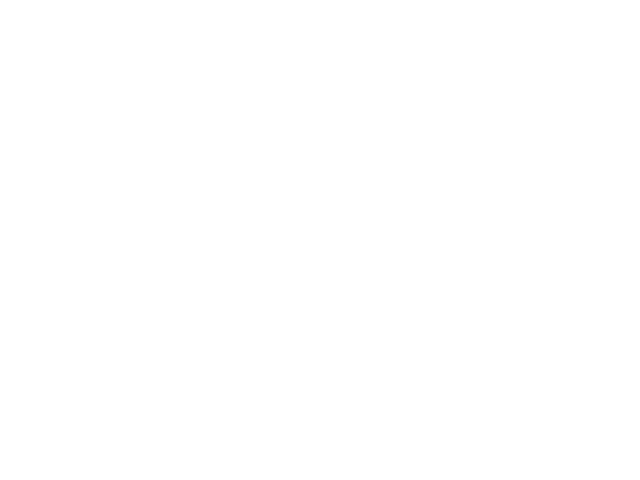

  3%|▎         | 43/1324 [00:09<04:44,  4.51it/s]

<IPython.core.display.Javascript object>


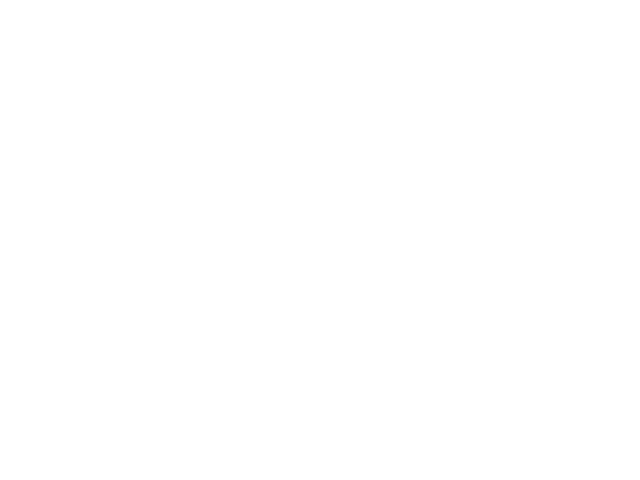

  3%|▎         | 44/1324 [00:09<04:38,  4.60it/s]

<IPython.core.display.Javascript object>


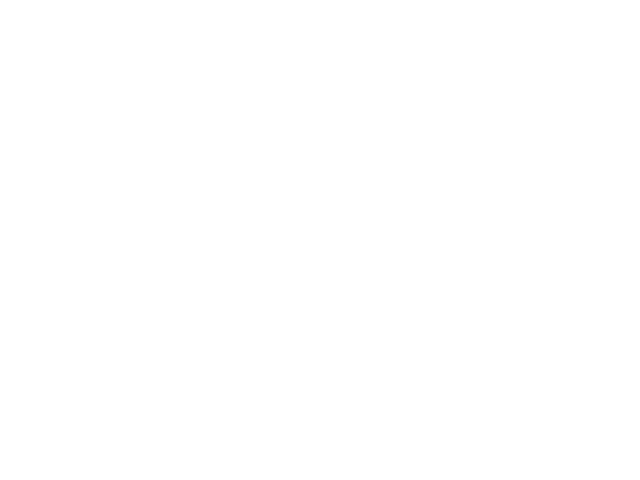

  3%|▎         | 45/1324 [00:09<04:37,  4.62it/s]

<IPython.core.display.Javascript object>


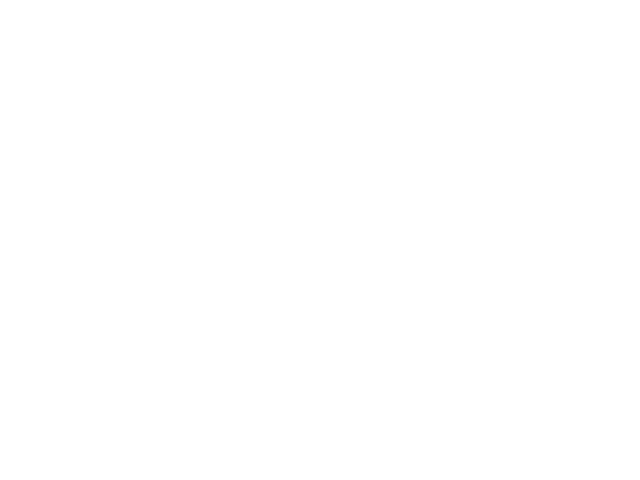

  3%|▎         | 46/1324 [00:09<04:33,  4.67it/s]

<IPython.core.display.Javascript object>


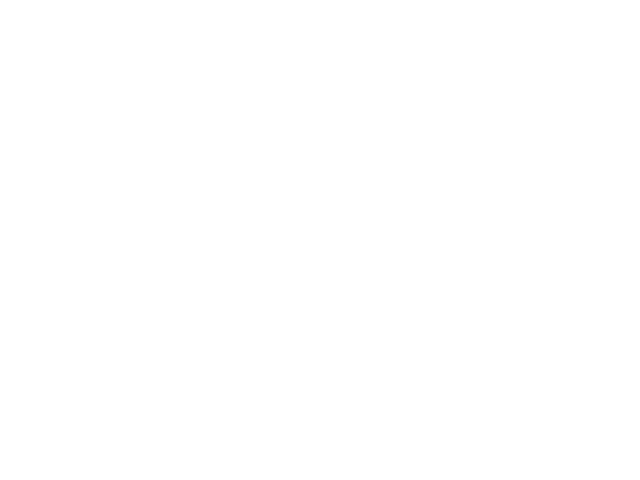

  4%|▎         | 47/1324 [00:10<04:32,  4.69it/s]

<IPython.core.display.Javascript object>


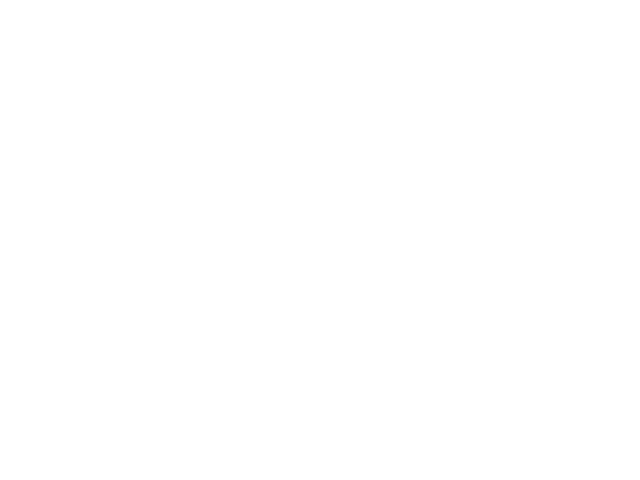

  4%|▎         | 48/1324 [00:10<05:03,  4.20it/s]

<IPython.core.display.Javascript object>


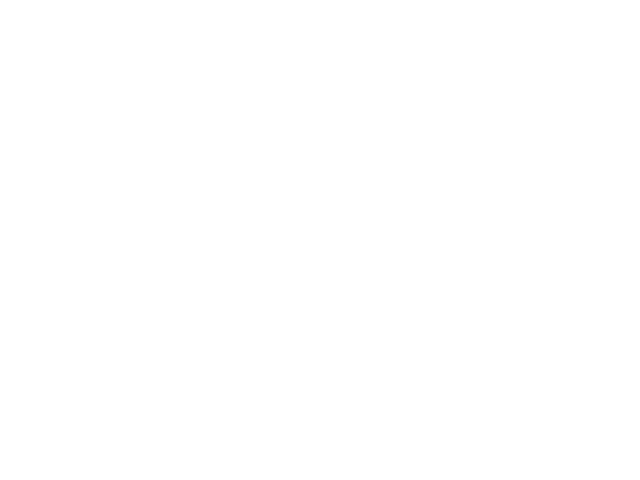

  4%|▎         | 49/1324 [00:10<04:52,  4.36it/s]

<IPython.core.display.Javascript object>


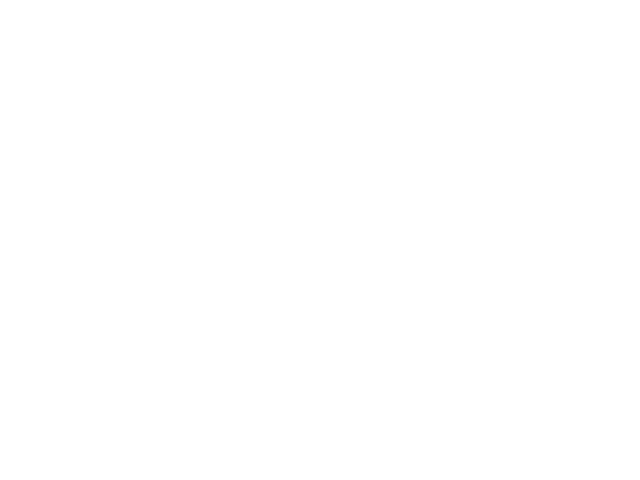

  4%|▍         | 50/1324 [00:10<04:47,  4.42it/s]

<IPython.core.display.Javascript object>


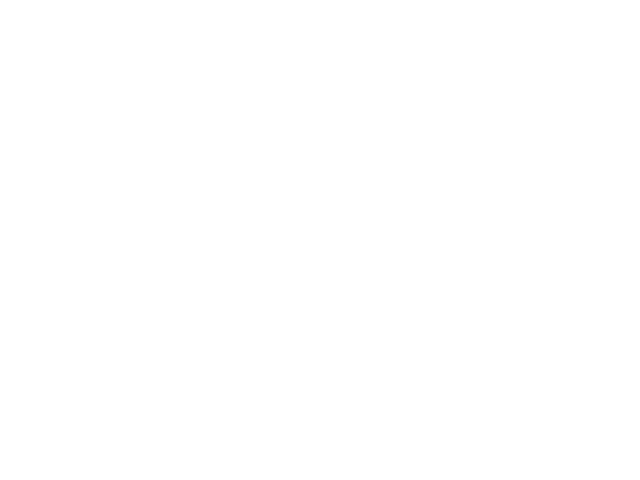

  4%|▍         | 51/1324 [00:11<04:56,  4.29it/s]

<IPython.core.display.Javascript object>


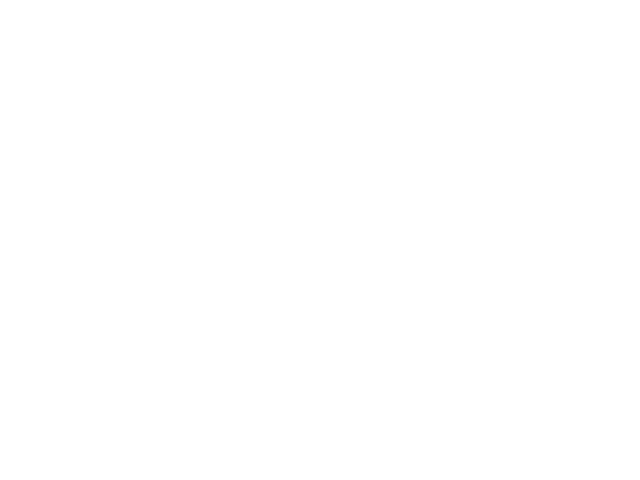

  4%|▍         | 52/1324 [00:11<05:04,  4.17it/s]

<IPython.core.display.Javascript object>


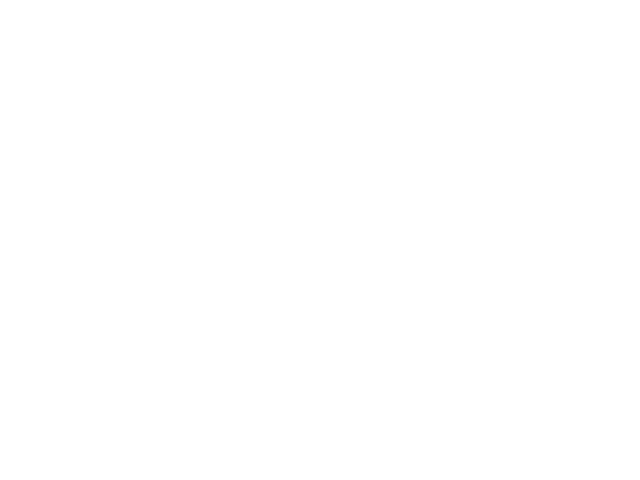

  4%|▍         | 53/1324 [00:11<05:03,  4.19it/s]

<IPython.core.display.Javascript object>


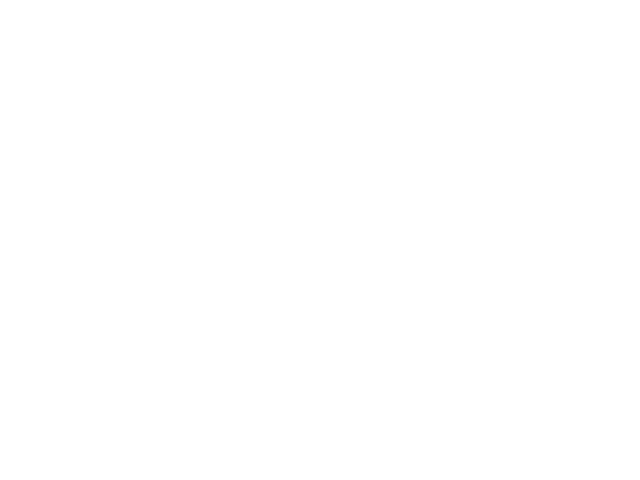

  4%|▍         | 54/1324 [00:11<05:32,  3.82it/s]

<IPython.core.display.Javascript object>


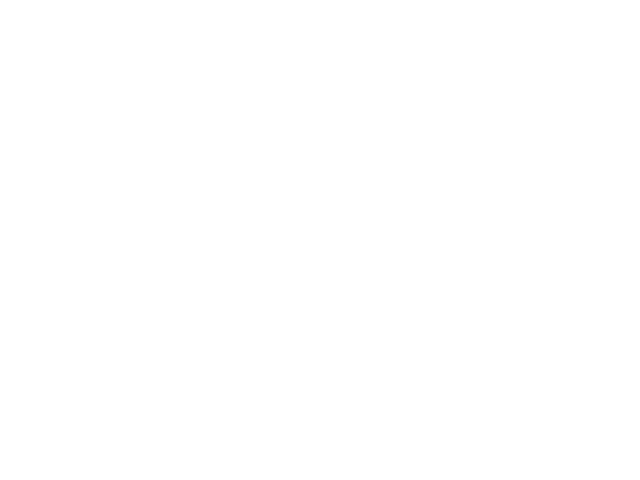

  4%|▍         | 55/1324 [00:12<05:17,  3.99it/s]

<IPython.core.display.Javascript object>


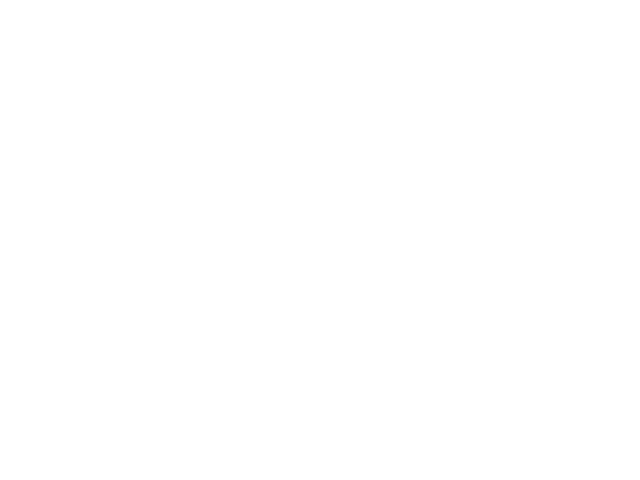

  4%|▍         | 56/1324 [00:12<05:03,  4.18it/s]

<IPython.core.display.Javascript object>


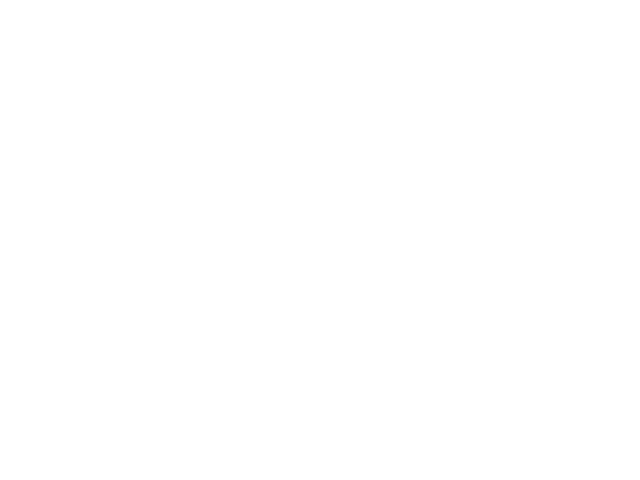

  4%|▍         | 57/1324 [00:12<04:49,  4.37it/s]

<IPython.core.display.Javascript object>


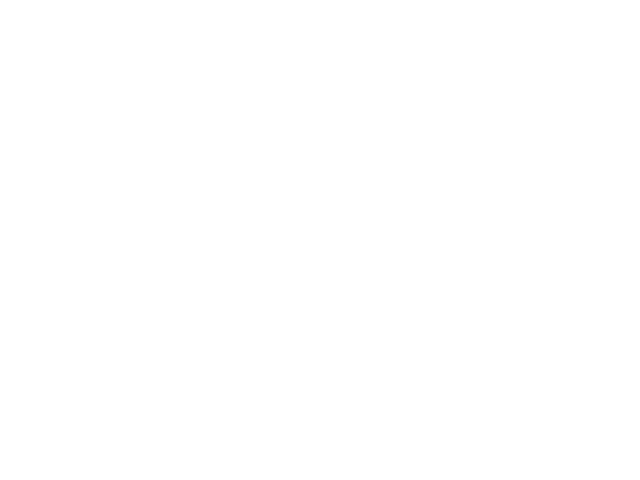

  4%|▍         | 58/1324 [00:12<04:48,  4.38it/s]

<IPython.core.display.Javascript object>


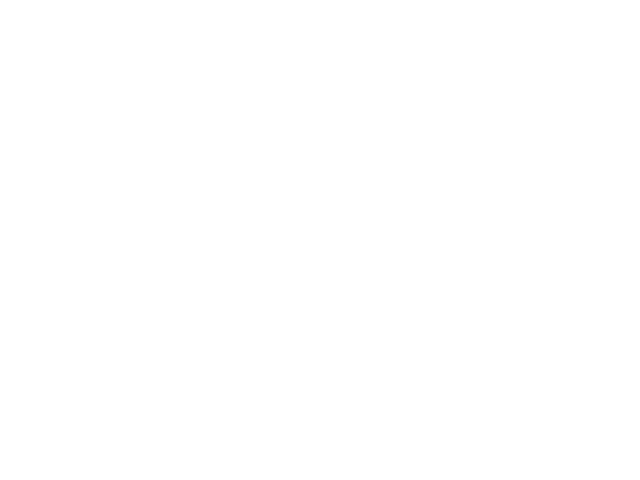

  4%|▍         | 59/1324 [00:12<04:48,  4.38it/s]

<IPython.core.display.Javascript object>


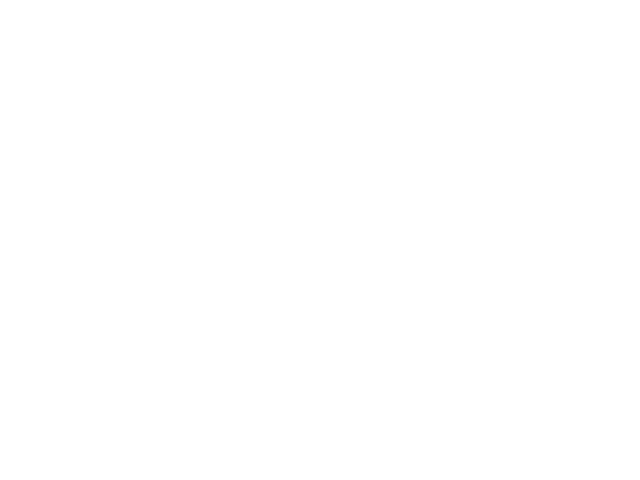

  5%|▍         | 60/1324 [00:13<05:08,  4.10it/s]

<IPython.core.display.Javascript object>


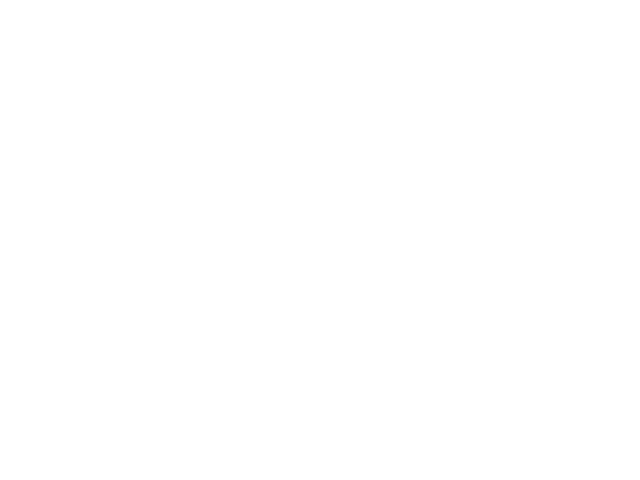

  5%|▍         | 61/1324 [00:13<04:49,  4.36it/s]

<IPython.core.display.Javascript object>


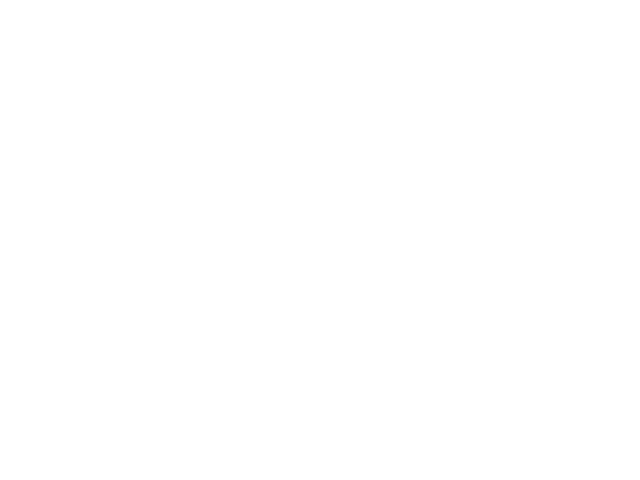

  5%|▍         | 62/1324 [00:13<04:44,  4.43it/s]

<IPython.core.display.Javascript object>


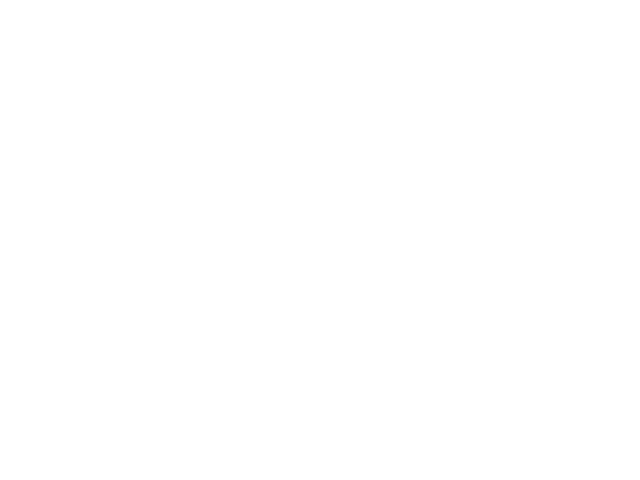

  5%|▍         | 63/1324 [00:13<04:31,  4.64it/s]

<IPython.core.display.Javascript object>


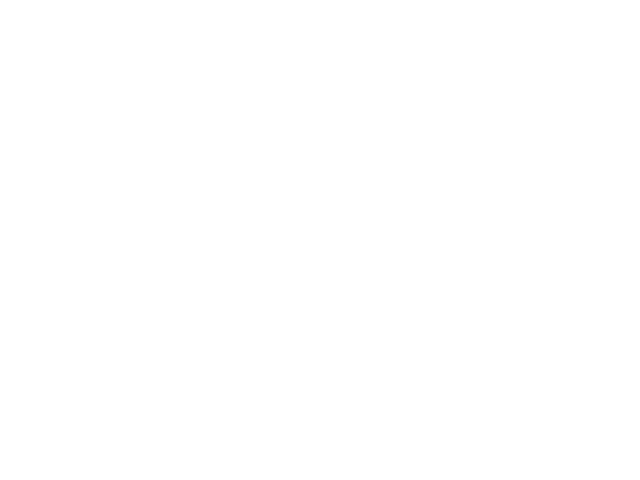

  5%|▍         | 64/1324 [00:14<04:24,  4.76it/s]

<IPython.core.display.Javascript object>


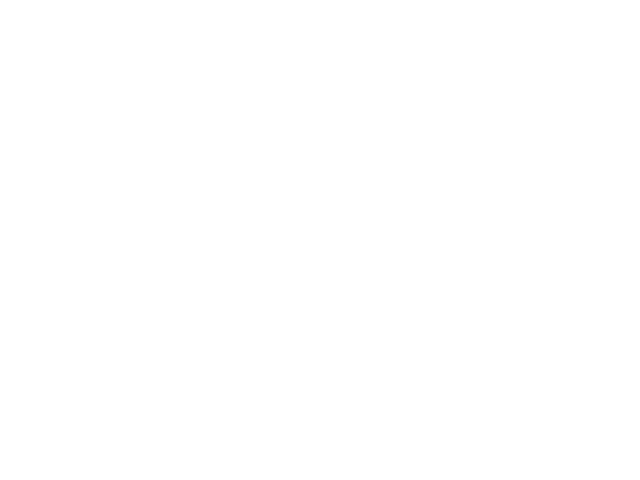

  5%|▍         | 65/1324 [00:14<04:21,  4.81it/s]

<IPython.core.display.Javascript object>


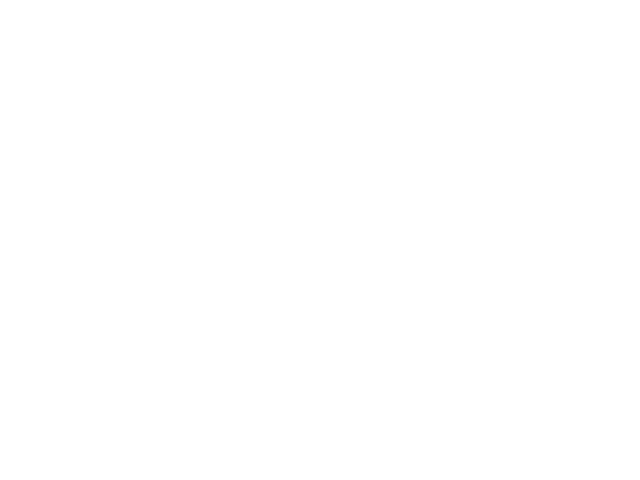

  5%|▍         | 66/1324 [00:14<04:47,  4.38it/s]

<IPython.core.display.Javascript object>


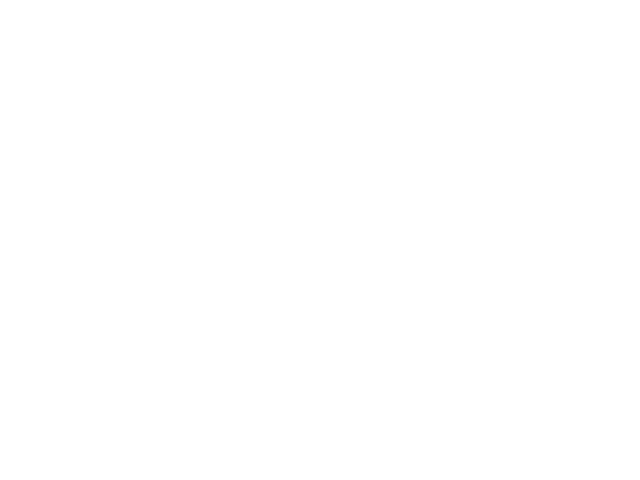

  5%|▌         | 67/1324 [00:14<04:39,  4.50it/s]

<IPython.core.display.Javascript object>


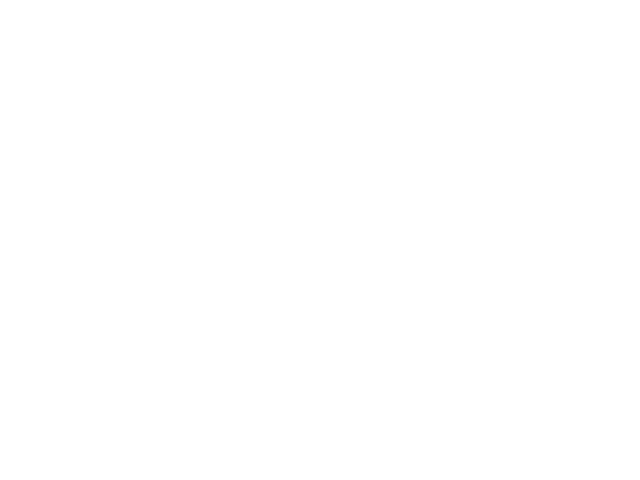

  5%|▌         | 68/1324 [00:14<04:37,  4.53it/s]

<IPython.core.display.Javascript object>


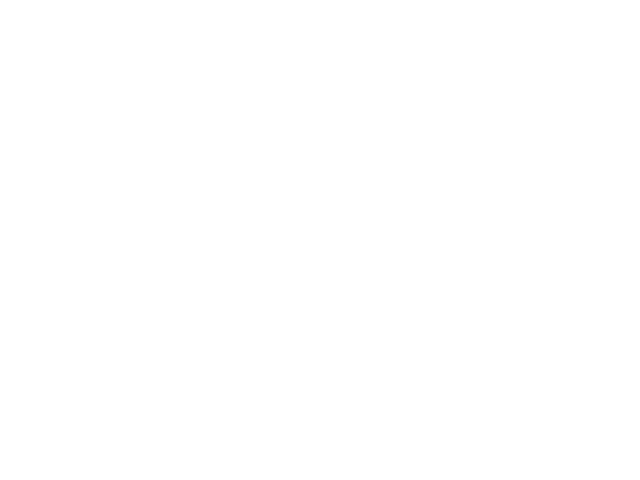

  5%|▌         | 69/1324 [00:15<04:29,  4.65it/s]

<IPython.core.display.Javascript object>


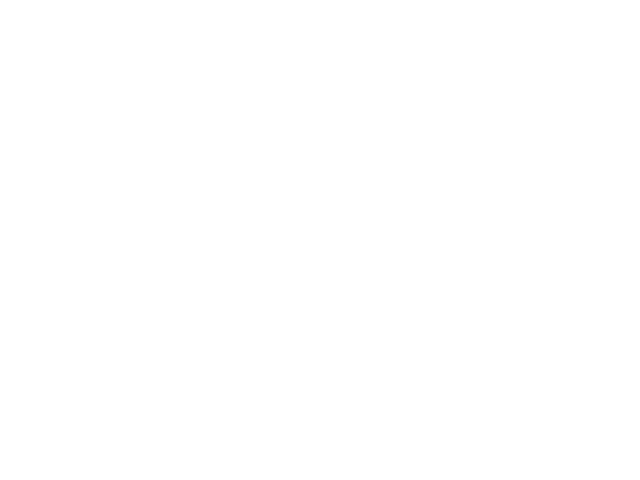

  5%|▌         | 70/1324 [00:15<04:22,  4.78it/s]

<IPython.core.display.Javascript object>


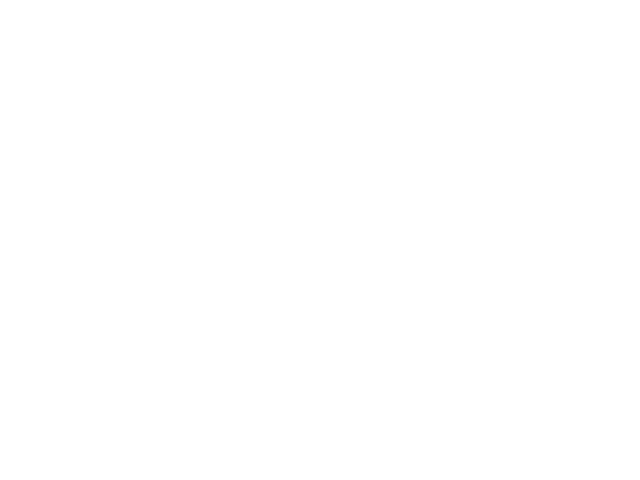

  5%|▌         | 71/1324 [00:15<04:20,  4.82it/s]

<IPython.core.display.Javascript object>


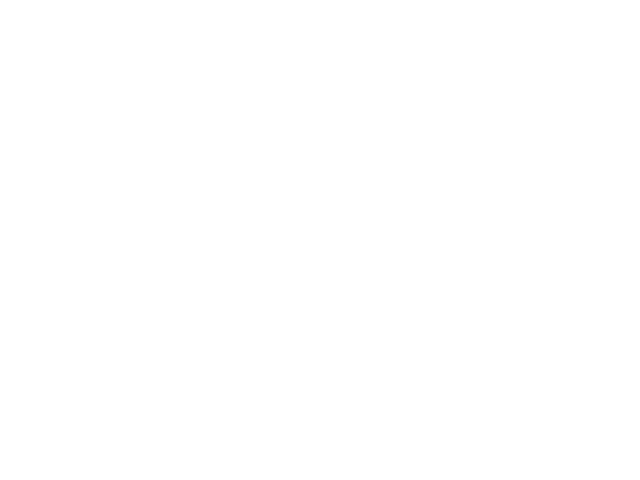

  5%|▌         | 72/1324 [00:15<04:49,  4.33it/s]

<IPython.core.display.Javascript object>


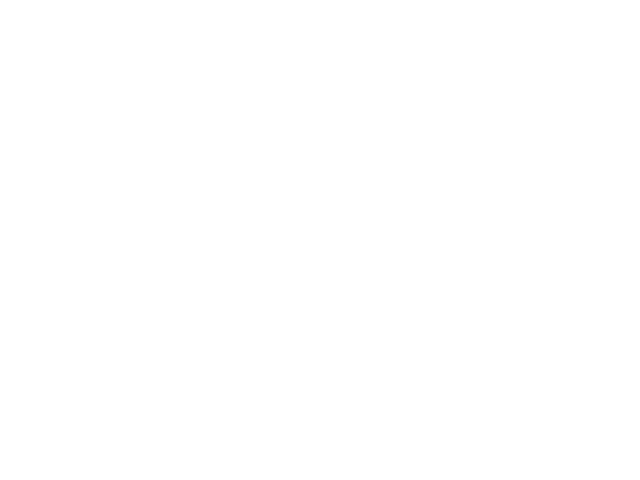

  6%|▌         | 73/1324 [00:16<04:42,  4.43it/s]

<IPython.core.display.Javascript object>


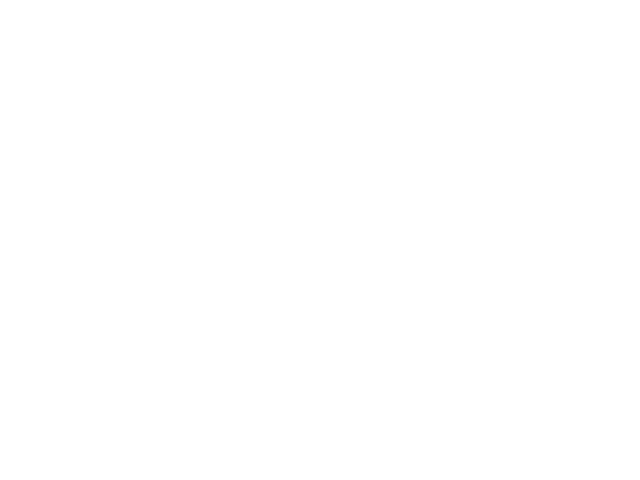

  6%|▌         | 74/1324 [00:16<04:32,  4.59it/s]

<IPython.core.display.Javascript object>


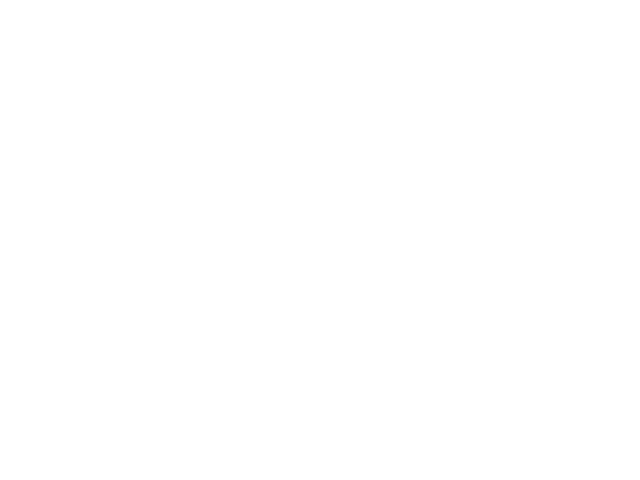

  6%|▌         | 75/1324 [00:16<04:27,  4.67it/s]

<IPython.core.display.Javascript object>


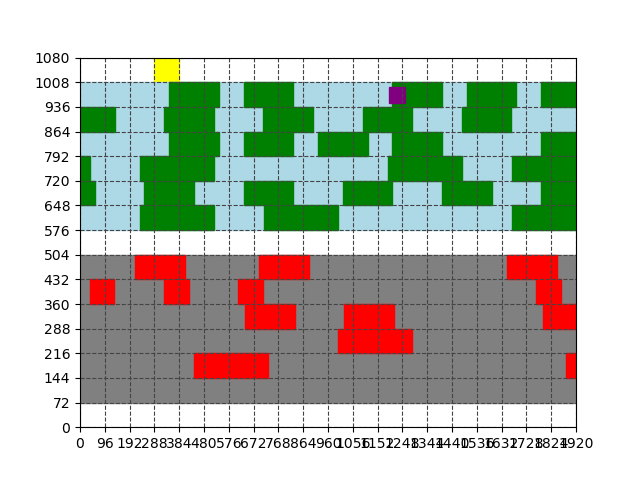

  6%|▌         | 75/1324 [00:16<04:36,  4.51it/s]


KeyboardInterrupt: 

In [9]:
# generate_plots(states, target_position)
#
# %matplotlib notebook
#
# animate_plots('./test/')